# FLX_JP-BBY
partition FLUXNET-CH4 data from Bibai bog into diffusive and ebullitive fluxes

In [1]:
import pandas as pd
import numpy as np
import pywt
import wavefuncs as wave
import plotter as p

from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from numpy.polynomial import Polynomial as P
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# global plotting settings
plt.style.use('ggplot')
# text_kwargs = dict(ha='center', va='center', fontsize=28, color='C1') 

# 10 Hz

read .dat file

pre-processing
-filter extreme outliers
-use PA and humidity to calculate dry air fraction
-

# Half Hourly

In [3]:
df = wave.read('FLX_US-TrS', method='file')

In [4]:
df['TIMESTAMP_START'] = df['TIMESTAMP_START'].map('{:.1f}'.format).astype(float)

In [5]:
df['TIMESTAMP_START'][45]

202003012230.0

In [6]:
df = (df.replace(-9999, np.nan)
        .assign(date=lambda x: pd.to_datetime(x['TIMESTAMP_START'],
                                             format='%Y%m%d%H%S%f'))
        .set_index('date')
     )

In [7]:
df.index

DatetimeIndex(['2020-03-01 00:00:00', '2020-03-01 00:00:03',
               '2020-03-01 01:00:00', '2020-03-01 01:00:03',
               '2020-03-01 02:00:00', '2020-03-01 02:00:03',
               '2020-03-01 03:00:00', '2020-03-01 03:00:03',
               '2020-03-01 04:00:00', '2020-03-01 04:00:03',
               ...
               '2020-10-31 19:00:00', '2020-10-31 19:00:03',
               '2020-10-31 20:00:00', '2020-10-31 20:00:03',
               '2020-10-31 21:00:00', '2020-10-31 21:00:03',
               '2020-10-31 22:00:00', '2020-10-31 22:00:03',
               '2020-10-31 23:00:00', '2020-10-31 23:00:03'],
              dtype='datetime64[ns]', name='date', length=11760, freq=None)

In [11]:
df.columns

Index(['TIMESTAMP_START', 'TIMESTAMP_END', 'CO2', 'CO2_MIXING_RATIO',
       'CO2_SIGMA', 'CH4_MIXING_RATIO', 'H2O', 'H2O_MIXING_RATIO', 'H2O_SIGMA',
       'FC', 'FC_SSITC_TEST', 'FCH4', 'FCH4_SSITC_TEST', 'H', 'LE',
       'LE_SSITC_TEST', 'WS', 'USTAR', 'U_SIGMA', 'V_SIGMA', 'W_SIGMA',
       'T_SONIC', 'T_SONIC_SIGMA', 'TAU', 'TAU_SSITC_TEST', 'ALB', 'NETRAD',
       'SW_IN', 'SW_OUT', 'LW_IN', 'LW_OUT', 'ZL', 'FETCH_MAX', 'FETCH_70',
       'FETCH_90'],
      dtype='object')

In [20]:
df.loc['2020-08-01':'2020-08-02', 'CH4_MIXING_RATIO'].shape

(96,)

<AxesSubplot:xlabel='date'>

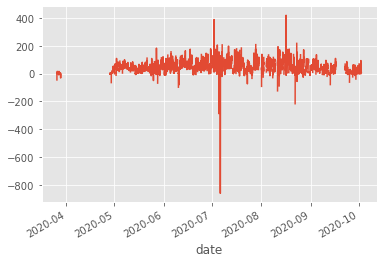

In [8]:
df['LE'].plot()

<AxesSubplot:xlabel='date'>

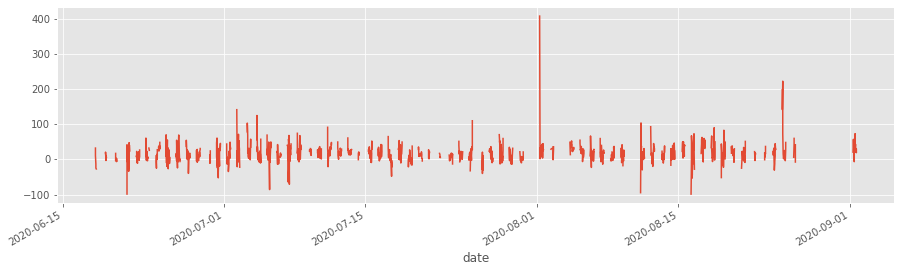

In [9]:
df.loc['2020-06-15':'2020-09-01', 'FCH4'].plot(figsize=(15,4))

<AxesSubplot:xlabel='date'>

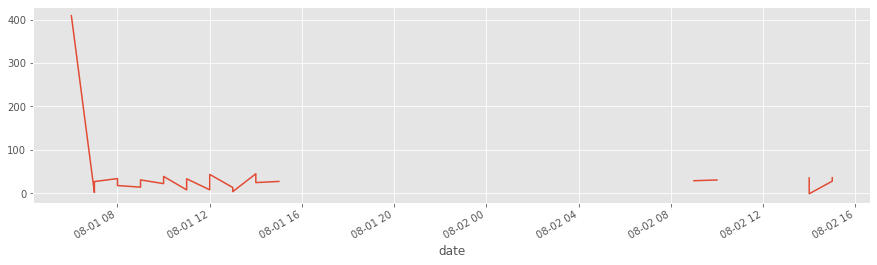

In [10]:
df.loc['2020-08-01':'2020-08-02', 'FCH4'].plot(figsize=(15,4))

In [10]:
windows = wave.chop(df, samples = 239, col='FCH4', freq='100ms')

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: DatetimeIndex(['2020-03-26 13:00:00.100000', '2020-03-26 13:00:00.200000',\n               '2020-03-26 13:00:00.300000', '2020-03-26 13:00:00.400000',\n               '2020-03-26 13:00:00.500000',\n               ...\n               '2020-03-26 13:00:23.400000', '2020-03-26 13:00:23.500000',\n               '2020-03-26 13:00:23.600000', '2020-03-26 13:00:23.700000',\n               '2020-03-26 13:00:23.800000'],\n              dtype='datetime64[ns]', length=237, freq=None). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [ ]:
for i in range(len(windows)):
    df.loc[windows[i], 'window'] = i 